In [1]:
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Polygon
import time
import requests
import json

In [30]:
data = pd.read_excel('经纬度.xlsx')

def points(row):
    lon, lat = row[1], row[2]
    return m(lon, lat)

2.0110251903533936


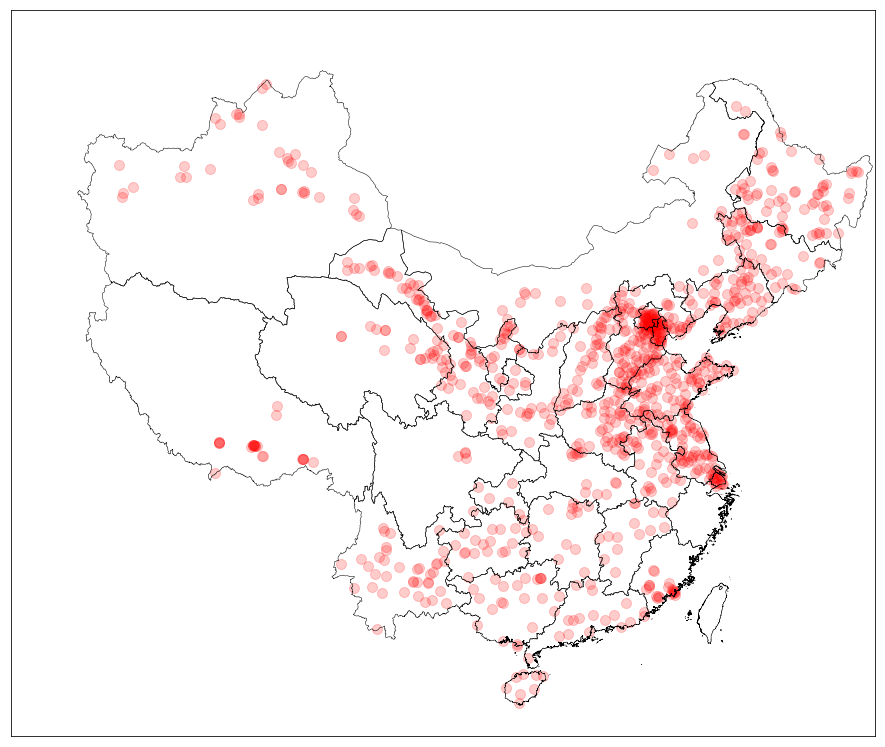

In [105]:
s = time.time()
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=80.33, 
              llcrnrlat=13.01, 
              urcrnrlon=138.16, 
              urcrnrlat=56.123,
             #resolution='h', 
            projection='cass', lat_0 = 42.5,lon_0=120,ax=ax1)

shp_info = m.readshapefile("china_shapefile/gadm36_CHN_shp/gadm36_CHN_1", 'states',drawbounds=True)
shp_info_taiwan_province = m.readshapefile('taiwan/TWN_adm1', 'taiwan.province', drawbounds=True)
xy = data.apply(points, axis=1).str
data['x'], data['y'] = xy[0], xy[1]
print(time.time() - s)
plt.scatter(data['x'], data['y'], c='r', s=100, alpha=.2)
#m.arcgisimage(service='World_Physical_Map', xpixels=500, verbose=False)
plt.show()
fig.savefig('well.png')